# Deeper analysis of the data
The data is split into 10 classes, search for important attributes for each class.
or each **`train_smpl_<label>`** file, record the first 10 pixels, in order of the absolute
correlation value, for each street sign.

# Averaged by Column

In [134]:
import pandas as pd
import numpy as np

from Scripts import helperfn as hf

X, y = hf.get_data(0)

from Scripts import pixelFinder as pf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Scripts import downsample
%load_ext autoreload
%autoreload 2

downscaledX = downsample.downscale(X)

combined = hf.append_result_col(pd.DataFrame(X), y)
combinedDownscaled = hf.append_result_col(pd.DataFrame(downscaledX), y)

# --- SPLITTING INTO LABELS OF 1 AND 0 ---
# LABEL 0 - 210 VALUES
# LABEL 1 - 9480 VALUES

zeroLabel = []
zeroLabelDownscaled = []

for i in range(len(combined)):
    if combined.at[i, 'y'] == 0:
        zeroLabel.append(combined.loc[[i]])
        
    # elif combined.at[i, 'y'] == 1:
    #     oneLabel.append(combined.loc[[i]])

for i in range(len(combinedDownscaled)):
    if combinedDownscaled.at[i, 'y'] == 0:
        zeroLabelDownscaled.append(combinedDownscaled.loc[[i]])

# --- FINDING AVERAGE GREYSCALE VALUE FOR EACH COLUMN ---

    # Turning the list back into a DF
zeroDataframe = pd.DataFrame(pd.concat(zeroLabel))
zeroDataframeDownscaled = pd.DataFrame(pd.concat(zeroLabelDownscaled))
     
ColumnGetAverageGS = zeroDataframe.mean(axis=0)
ColumnGetAverageGSDownscaled = zeroDataframeDownscaled.mean(axis=0)

    # --- Dropping the y column ---
ColumnAverageGreyscale = ColumnGetAverageGS.drop(labels=['y'])
ColumnAverageGreyscaleDownscaled = ColumnGetAverageGSDownscaled.drop(labels=['y'])

#####################################################################################
# --- FINDING AVERAGE GREYSCALE VALUE FOR EACH ROW ---

transposeZeroDataframe = zeroDataframe.transpose().drop(labels=['y'])
transposeZeroDataframeDownscaled = zeroDataframeDownscaled.transpose().drop(labels=['y'])

RowAverageGreyscale = transposeZeroDataframe.mean(axis = 0)
RowAverageGreyscaleDownscaled = transposeZeroDataframeDownscaled.mean(axis = 0)




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


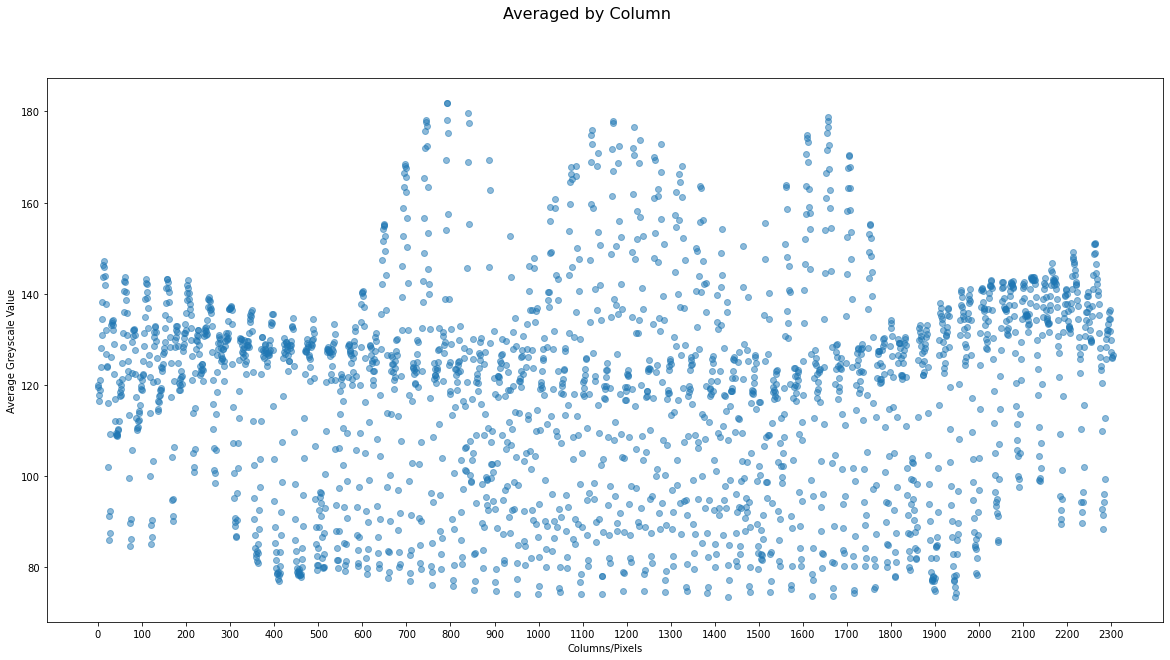

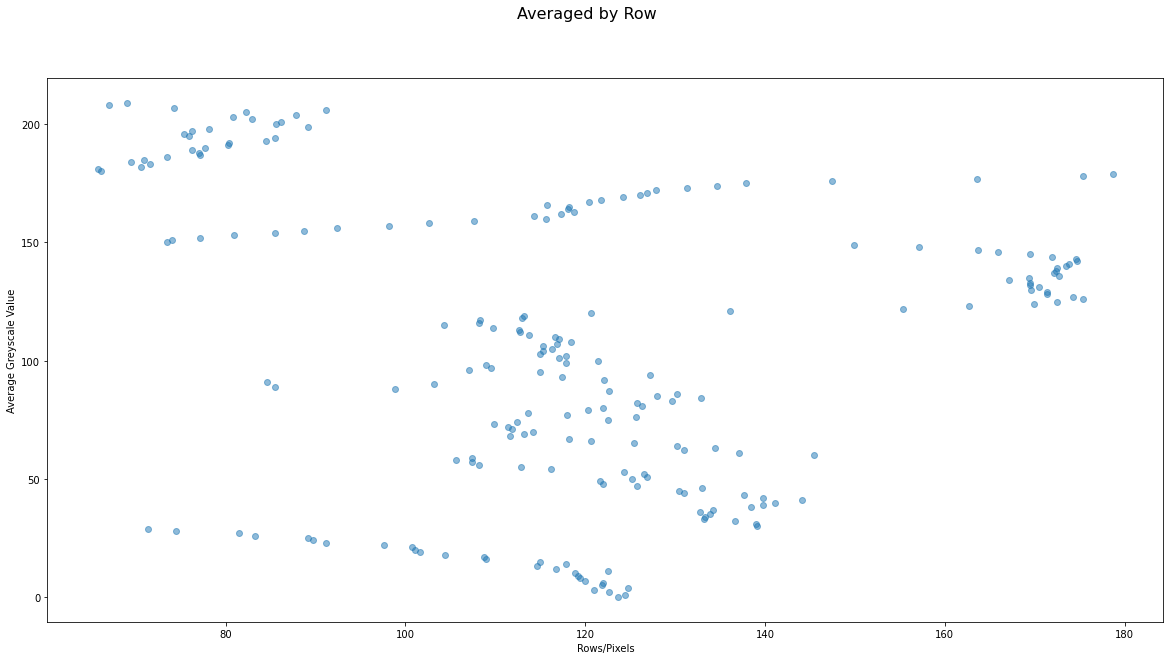

In [163]:
import matplotlib.pyplot as plt

# --- BY COLUMN ---

yValues = ColumnAverageGreyscale      # 2305
xValues = ColumnAverageGreyscale.index


fig = plt.figure(figsize= (20,10))
fig.suptitle('Averaged by Column', fontsize =16)
plt.scatter(xValues, yValues , marker='o', alpha = 0.5)
plt.xticks(xValues[::100])
plt.ylabel('Average Greyscale Value')
plt.xlabel('Columns/Pixels')
plt.show()

# --- BY ROW (transposed) ---

xValues2 = RowAverageGreyscale      #210 
yValues2 = RowAverageGreyscale.index

fig = plt.figure(figsize= (20,10))
fig.suptitle('Averaged by Row', fontsize =16)
plt.scatter(xValues2, yValues2 , marker='o', alpha = 0.5)
plt.ylabel('Average Greyscale Value')
plt.xlabel('Rows/Pixels')
plt.show()

# --- BOTH ---
# fig = plt.figure(figsize=(20,10))
# fig.suptitle('Averaged by Column vs Averaged by Row', fontsize =16)
# ax1 = fig.add_subplot(111)

# ax1.scatter(xValues, yValues, marker='o', c='b', alpha = 0.5, label='Original')
# ax1.scatter(xValues2, yValues2, marker='o', c='r', alpha=0.5, label='Downsampled')
# plt.xticks(xValues[::500])
# plt.ylabel('Average Greyscale Value')
# plt.xlabel('Columns/Pixels')
# plt.legend(loc='upper left')
# plt.show()


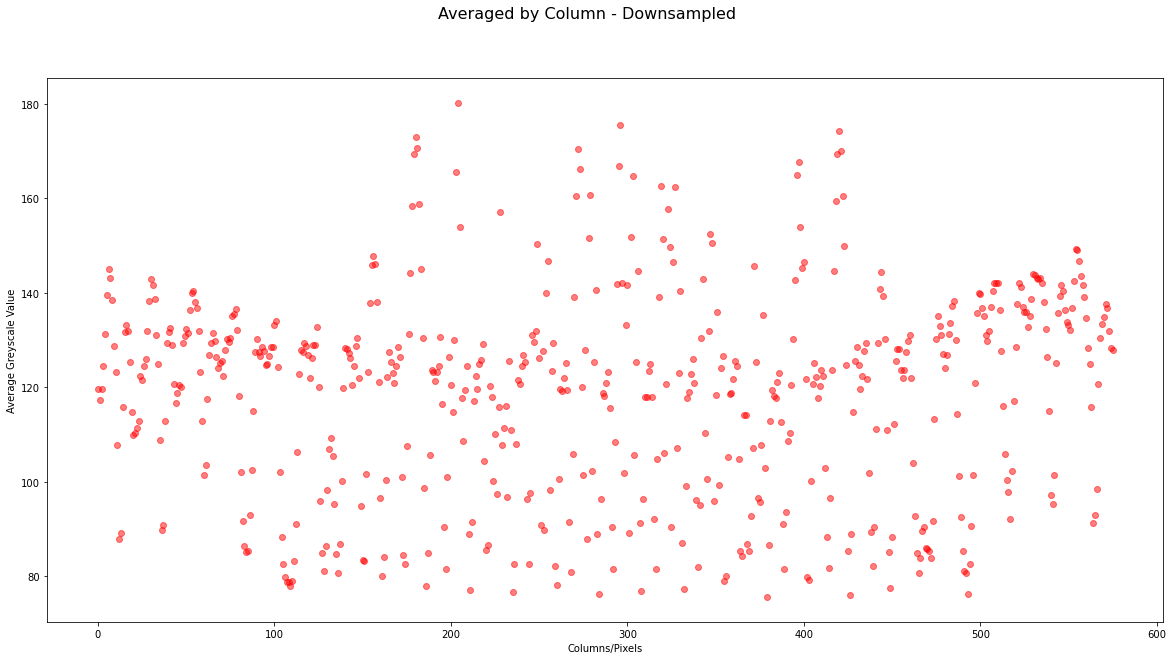

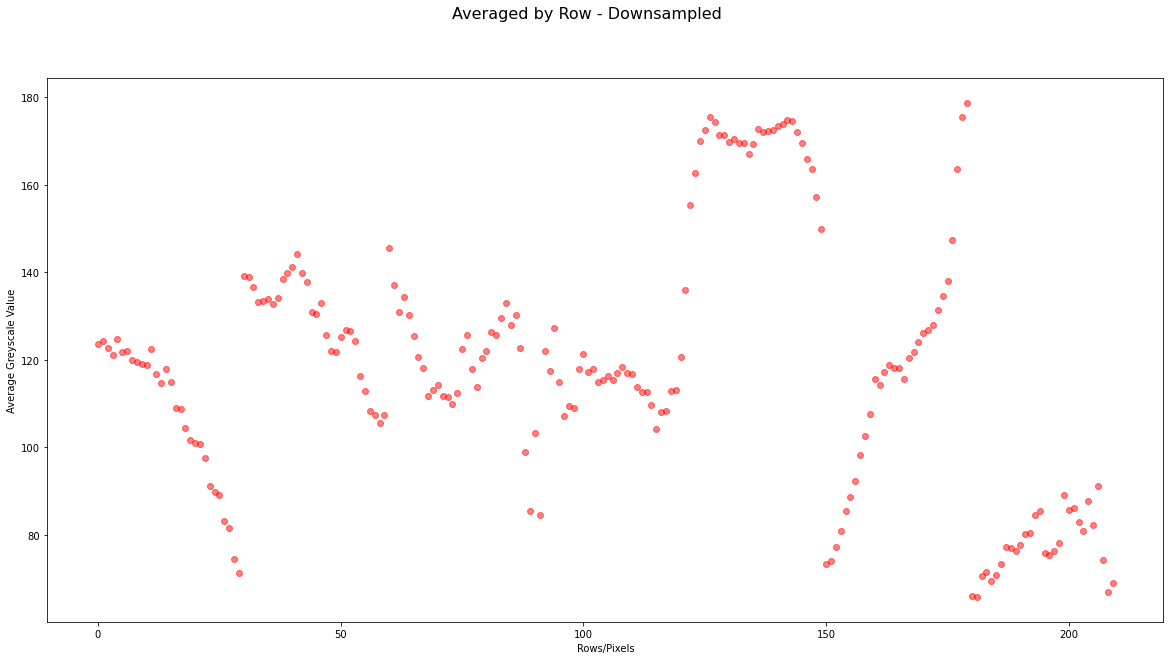

In [131]:
# --- Column Downscaled ---

yValuesDownscaled = ColumnAverageGreyscaleDownscaled
xValuesDownscaled = ColumnAverageGreyscaleDownscaled.index

fig1 = plt.figure(figsize= (20,10))
fig1.suptitle('Averaged by Column - Downsampled', fontsize =16)
plt.scatter(xValuesDownscaled, yValuesDownscaled, marker='o', c='r', alpha=0.5)

plt.ylabel('Average Greyscale Value')
plt.xlabel('Columns/Pixels')
plt.show()



# --- Row Downscaled ---

yValuesDownscaled2 = RowAverageGreyscaleDownscaled
xValuesDownscaled2 = RowAverageGreyscaleDownscaled.index

fig1 = plt.figure(figsize= (20,10))
fig1.suptitle('Averaged by Row - Downsampled', fontsize =16)
plt.scatter(xValuesDownscaled2, yValuesDownscaled2, marker='o', c='r', alpha=0.5)
plt.ylabel('Average Greyscale Value')
plt.xlabel('Rows/Pixels')
plt.show()

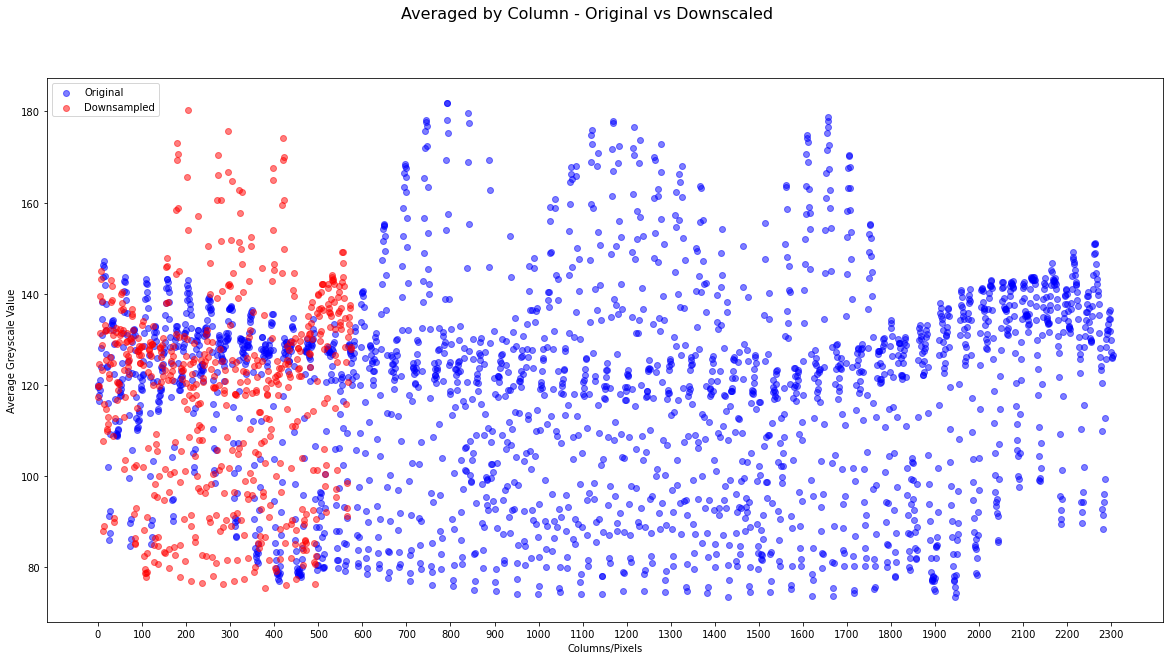

In [126]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Averaged by Column - Original vs Downscaled', fontsize =16)
ax1 = fig.add_subplot(111)

ax1.scatter(xValues, yValues, marker='o', c='b', alpha = 0.5, label='Original')
ax1.scatter(xValuesDownscaled, yValuesDownscaled, marker='o', c='r', alpha=0.5, label='Downsampled')
plt.xticks(xValues[::100])
plt.ylabel('Average Greyscale Value')
plt.xlabel('Columns/Pixels')
plt.legend(loc='upper left')
plt.show()

# Averaged by row

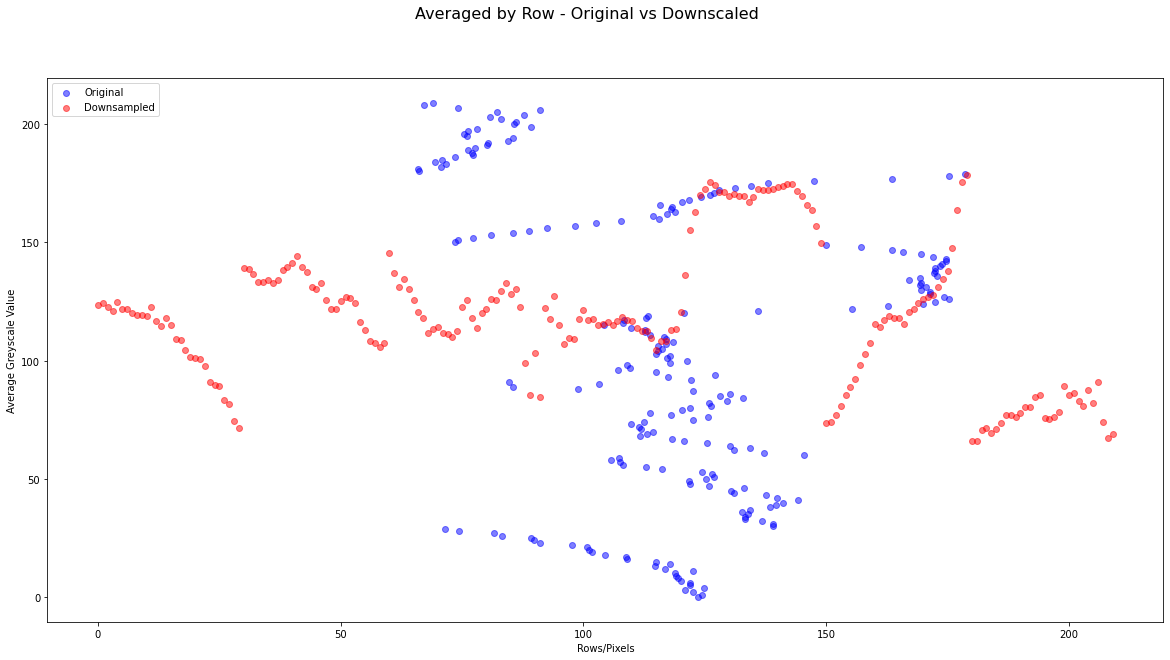

In [133]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Averaged by Row - Original vs Downscaled', fontsize =16)
ax1 = fig.add_subplot(111)

ax1.scatter(xValues2, yValues2, marker='o', c='b', alpha = 0.5, label='Original')
ax1.scatter(xValuesDownscaled2, yValuesDownscaled2, marker='o', c='r', alpha=0.5, label='Downsampled')
plt.ylabel('Average Greyscale Value')
plt.xlabel('Rows/Pixels')
plt.legend(loc='upper left')
plt.show()

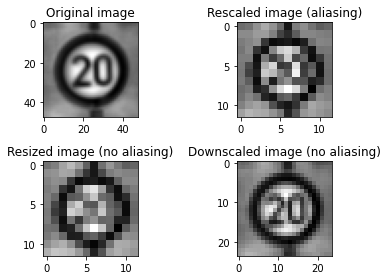

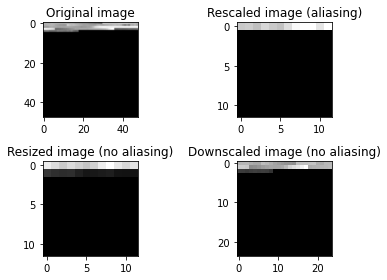

In [165]:
apple = ColumnAverageGreyscale.values.reshape(-1,1)
downsample.visualise_downsample(apple)
something = np.pad(RowAverageGreyscale, (0, 2094), 'constant')
downsample.visualise_downsample(something)